# Problem 4

### Import data

In [1]:
import pandas as pd

data_train = pd.read_csv('./p4/train_data.csv').iloc[:, 1:] #leave out the idx
data_test = pd.read_csv('./p4/test_data.csv').iloc[:, 1:]

x_train = data_train.iloc[:, :-1]
x_test = data_test.iloc[:, :-1]
y_train = data_train.iloc[:, -1]
y_test = data_test.iloc[:, -1]

In [2]:
# Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)


In [3]:
K = len(pd.value_counts(y_train))
K

4

### (a) Multinomial Logistic Regression

<url> https://zhuanlan.zhihu.com/p/97915473 <url> <br>
P(r|xi) 与 P(yi|xi) 要分清楚

<url>https://www.quora.com/What-is-the-gradient-of-the-log-likelihood-function-in-multinomial-logistic-regression<url>

In [18]:
import math
import numpy as np
from functools import reduce


def Softmax(xi, l, theta_):
    '''
    xi: array, (d,)
    theta: mat, (K, d)
    l: scaler, points to the exact class

    output: 
    res: scalar
    '''
    [xi, theta_] = list(map(np.array, [xi, theta_]))

    res = math.exp(theta_[l].T.dot(xi))/ \
          sum([math.exp(theta_[l].T.dot(xi)) for l in range(K)]) 

    return res

def loss(x, y, theta_):
    res = - sum([math.log(Softmax(x[i], y[i], theta_)) for i in range(len(x))])
    return res/len(x)

def grad(x, y, theta_):
    '''
    This function concatenates (in K dim) and adds up(of n instances) the gradient for theta 

    x: mat, (n, d)
    y: array, (n,)
    theta: mat, (K, d)

    output: mat, (K, d)
    '''
    def grad_i(xi, yi, theta_):
        '''
        This function calculates the gradient for instance i

        xi: array, (d,)
        yi: scalar
        theta: mat, (K, d)

        output: 
        tmp: np.array, (d,) which stands for the gradient for class l
        res: np.array, (K, d)
        '''
        [xi, yi, theta_] = list(map(np.array, [xi, yi, theta_]))

        def tmp(l):
            def indicator(k): return 1 if yi == k else 0
            return (- indicator(l) + Softmax(xi, l, theta_)) * xi

        # Concatenate over K dim
        def stack_K(a1, a2): return np.vstack((a1, a2))
        res = reduce(stack_K, [tmp(l) for l in range(K)])

        return res
    
    sum_ = sum([grad_i(x[i], y[i], theta_) for i in range(len(x))])

    return sum_/len(x)

In [20]:
def AGD(ini_theta):   
    theta = ini_theta - alpha * grad(x_train_std, y_train, ini_theta) 
    theta_old = ini_theta

    train_loss = [loss(x_train_std, y_train, ini_theta)] # To record the training loss after each iteration
    test_loss = [loss(x_test_std, y_test, ini_theta)] # testing loss
    
    print('iter:')

    for t in range(1, max_iter):
        train_loss.append(loss(x_train_std, y_train, theta))
        test_loss.append(loss(x_test_std, y_test, theta))

        theta_v = theta + (t-1)/(t+2) * (theta - theta_old)
        theta_new = theta_v - alpha * grad(x_train_std, y_train, theta_v)
        
        print(t, end=' ')

        theta_old, theta = theta, theta_new
        
    train_loss.append(loss(x_train_std, y_train, theta_new))
    test_loss.append(loss(x_test_std, y_test, theta_new))

    return theta_new, train_loss, test_loss

In [21]:
alpha = 0.01
max_iter = 2000 

a = np.arange(K*20)/100
theta_fin, train_loss, test_loss = AGD(a.reshape(K, 20))

iter:
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 27

Running time: 7' 5''

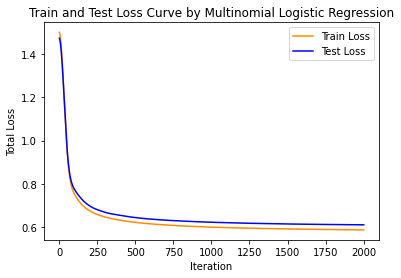

In [22]:
# Plot the training loss and test loss
import matplotlib.pyplot as plt

plt.plot(np.arange(1, max_iter+2), train_loss, c='darkorange', label='Train Loss')
plt.plot(np.arange(1, max_iter+2), test_loss, c='blue', label='Test Loss')
plt.xlabel("Iteration")
plt.ylabel("Total Loss")
plt.title("Train and Test Loss Curve by Multinomial Logistic Regression")
plt.legend()
plt.show()

In [23]:
# Prediction
def predict(x):
    '''
    x: mat, (n, d)
    theta_fin: mat, (K, d), the learnt parameters

    output: 
    y_pred: array, (n,), whose elements all in range(0,4)
    '''
    y_pred = []
    for xi in x:
        res = [Softmax(xi, l, theta_fin) for l in range(K)]
        yi_pred = res.index(max(res))
        y_pred.append(yi_pred)
    return y_pred

y_train_pred = predict(x_train_std)
y_test_pred = predict(x_test_std)

In [24]:
# Accuracy
from sklearn.metrics import accuracy_score

print(f'The train accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'The test accuracy: {accuracy_score(y_test, y_test_pred)}')

The train accuracy: 0.6288235294117647
The test accuracy: 0.62


In [161]:
# Determine the most important feature
rank = list(np.linalg.norm(theta_fin, axis=0, ord=2))
data_train.columns[rank.index(max(rank))]

'ram'

### (b) Ordinal Logistic Regression

<url> https://en.wikipedia.org/wiki/Ordinal_regression

In [5]:
import math
import numpy as np
from functools import reduce

def sigmoid(xi, l, theta_ord, z):
    '''
    h(m_l) = Logit(z_l - theta * xi)

    xi: array, (d,)
    theta_ord: array, (d,), theta unified here for all the class in ordinal logistic.
    z: array, (K+1,), which functions as the main part of classifiers; 
       make sure that z0<z1<z2<z3<z4, or the log in loss function would go error
    l: scaler, points to the exact class, range(0, K), (1 smaller than l in the documents)
    
    output: scalar
    '''
    [xi, theta_ord, z] = list(map(np.array, [xi, theta_ord, z]))
    res = 1 / (1 + math.exp(theta_ord.dot(xi) - z[l+1])) # Here the index problem has been adjusted
    return res

def loss(x, y, theta_ord, z):
    res = - sum([math.log(sigmoid(x[i], y[i], theta_ord, z) - sigmoid(x[i], y[i]-1, theta_ord, z)) for i in range(len(x))])
    return res/len(x)

def grad(x, y, theta_ord, z):
    '''
    (Update theta and z together so calculation cost is saved)

    if y[i] == l, the following gets updated, or else remain zero
    grad_theta = (h(m_l) + h(m_l-1) - 1) * x_i
    grad_z_l = h(m_l) * (1 - h(m_l)) / (h(m_l) - h(m_l-1))
    grad_z_l-1 = - h(m_l-1) * (1 - h(m_l-1)) / (h(m_l) - h(m_l-1))

    x: mat, (n, d)
    y: array, (n,)
    theta_ord: array, (d,)
    z: array, (K+1,)

    output: 
    theta: (d,)
    z: (K+1,)
    
    ''' 
    [theta_ord, z] = list(map(np.array, [theta_ord, z]))

    def grad_component(i):
        d = len(theta_ord)
        l = y[i]
        res1 = sigmoid(x[i], l, theta_ord, z)
        res2 = sigmoid(x[i], l-1, theta_ord, z)
        
        nabla = np.zeros((d+K+1, ))

        # update for theta
        nabla[:d] = (res1 + res2 - 1) * x[i]  

        # update for z
        nabla[d+l+1] = res1 * (1 - res1) / (res1 - res2)
        nabla[d+l] = - res2 * (1- res2) / (res1 - res2)
        # The index problem has been adjusted in sigmoid function
        # The other components remain zero
        return nabla
    
    def add(a, b): return a + b
    res = - reduce(add, [grad_component(i) for i in range(len(x))]) / len(x)

    return res[:len(theta_ord)], res[len(theta_ord):]


In [13]:
def AGD_2(ini_theta, ini_z):
    update_theta, update_z = grad(x_train_std, y_train, ini_theta, ini_z)

    theta = ini_theta - alpha * update_theta
    theta_old = ini_theta
    z = ini_z - alpha * update_z
    z_old = ini_z

    train_loss = [loss(x_train_std, y_train, ini_theta, ini_z)] # To record the training loss after each iteration
    test_loss = [loss(x_test_std, y_test, ini_theta, ini_z)] # testing loss
    
    print('iter:')

    for t in range(1, max_iter):
        train_loss.append(loss(x_train_std, y_train, theta, z))
        test_loss.append(loss(x_test_std, y_test, theta, z))

        theta_v = theta + (t-1)/(t+2) * (theta - theta_old)
        z_v = z + (t-1)/(t+2) * (z - z_old)

        update_theta, update_z = grad(x_train_std, y_train, theta_v, z_v)
        theta_new = theta_v - alpha * update_theta
        z_new = z_v - alpha * update_z
        
        print(t, end=' ')

        theta_old, theta = theta, theta_new
        z_old, z = z, z_new
        
    train_loss.append(loss(x_train_std, y_train, theta_new, z_new))
    test_loss.append(loss(x_test_std, y_test, theta_new, z_new))

    return theta_new, z_new, train_loss, test_loss

In [14]:
alpha = 0.01
max_iter = 2000

theta_0 = np.random.randn(20)
z_0 = np.arange(K+1) / 10 
# If the initial value is set to be too small, then chances are z will not follow its sequence.

theta_fin, z_fin, train_loss, test_loss = AGD_2(theta_0, z_0)


iter:
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 27

Running time: 3' 2''

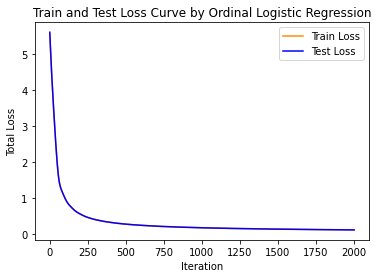

In [15]:
# Plot the training loss and test loss
import matplotlib.pyplot as plt

plt.plot(np.arange(1, max_iter+2), train_loss, c='darkorange', label='Train Loss')
plt.plot(np.arange(1, max_iter+2), test_loss, c='blue', label='Test Loss')
plt.xlabel("Iteration")
plt.ylabel("Total Loss")
plt.title("Train and Test Loss Curve by Ordinal Logistic Regression")
plt.legend()
plt.show()

In [16]:
def predict(x):
    '''
    x: mat, (n, d)
    theta_fin: (d,)
    z_fin: (K+1,)
    
    output: 
    y_pred: array, (n,), whose elements all in range(0,4)
    '''
    y_pred = []
    for xi in x:
        res = [sigmoid(xi, l, theta_fin, z_fin) - sigmoid(xi, l-1, theta_fin, z_fin) for l in range(K)]
        yi_pred = res.index(max(res))
        y_pred.append(yi_pred)
    return y_pred

y_train_pred = predict(x_train_std)
y_test_pred = predict(x_test_std)

In [17]:
# Accuracy
from sklearn.metrics import accuracy_score

print(f'The train accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'The test accuracy: {accuracy_score(y_test, y_test_pred)}')

The train accuracy: 0.9782352941176471
The test accuracy: 0.9766666666666667
